In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot  as plt
%matplotlib inline

In [4]:
dataFileName='http://facweb.cs.depaul.edu/mobasher/classes/csc478/Data/bank_data.csv'
df = pd.read_csv(dataFileName,index_col=0)
df_not_normalized=df.copy()
df.shape

(600, 11)

#### 1. Explore the general characteristics of the data as a whole:¶
   examine the means, standard deviations, and other statistics associated with the numerical attributes; 
   also show the distributions of values associated with categorical attributes (for categorical attributes use Matplotlib library and/or plotting capabilities of Pandas to generate bar charts showing the distribution of categories for each attribute).

In [16]:
df.columns

Index(['age', 'income', 'children', 'gender', 'region', 'married', 'car',
       'savings_acct', 'current_acct', 'mortgage', 'pep'],
      dtype='object')

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 600 entries, ID12101 to ID12700
Data columns (total 11 columns):
age             600 non-null int64
income          600 non-null float64
children        600 non-null int64
gender          600 non-null object
region          600 non-null object
married         600 non-null object
car             600 non-null object
savings_acct    600 non-null object
current_acct    600 non-null object
mortgage        600 non-null object
pep             600 non-null object
dtypes: float64(1), int64(2), object(8)
memory usage: 56.2+ KB


In [21]:
df.dtypes

age               int64
income          float64
children          int64
gender           object
region           object
married          object
car              object
savings_acct     object
current_acct     object
mortgage         object
pep              object
dtype: object

In [30]:
df.describe()

,age,income,children
count,600.000000,600.000000,600.000000
mean,42.395000,27524.031217,1.011667
std,14.424947,12899.468246,1.056752
min,18.000000,5014.210000,0.000000
25%,30.000000,17264.500000,0.000000
50%,42.000000,24925.300000,1.000000
75%,55.250000,36172.675000,2.000000
max,67.000000,63130.100000,3.000000


### 2. Suppose that the hypothetical bank is particularly interested in customers who buy the PEP (Personal Equity Plan) product. Compare and contrast the subsets of customers who buy and don't buy the PEP. Compute summaries (as in part 1) of the selected data with respect to all other attributes (you do not need to plot distributions). Can you observe any significant differences between these segments of customers? Discuss your observations.

In [34]:
df.pep.head(3)

id
ID12101    YES
ID12102     NO
ID12103     NO
Name: pep, dtype: object

In [48]:
#customer who buy pep
cutomers_buy_pep=df[df.pep=='YES']
cutomers_buy_pep.describe()

,age,income,children
count,274.000000,274.000000,274.000000
mean,45.127737,30644.919453,0.945255
std,14.327991,13609.613043,0.860571
min,18.000000,7756.360000,0.000000
25%,34.000000,19639.475000,0.000000
50%,45.000000,28080.050000,1.000000
75%,58.000000,38458.350000,1.000000
max,67.000000,63130.100000,3.000000


In [49]:
#customer who dont buy pep
cutomers_dont_buy_pep=df[df.pep=='NO']
cutomers_dont_buy_pep.describe()

,age,income,children
count,326.000000,326.000000,326.000000
mean,40.098160,24900.953374,1.067485
std,14.123506,11661.123422,1.195524
min,18.000000,5014.210000,0.000000
25%,27.000000,15366.475000,0.000000
50%,40.000000,23105.000000,0.000000
75%,51.000000,31210.900000,2.000000
max,67.000000,61554.600000,3.000000


In [1]:
## observation
#  based on the above, people who tend to buy PEP are a bit older , have  high incomes and less children
# whereas the customers that are relatively younger with lower income and with more childrens tend to not buy PEP. 

#### 3. Use z-score normalization to standardize the values of the income attribute. [Do not change the original income attribute or add the normalized income to the table.]

In [58]:
## Use z-score normalization to standardize the values of the income attribute.
zscore = lambda x : ((x - x.mean())/x.std()) if(x.dtypes==np.float64 or x.dtypes==np.int64) else x
df_income=df.income

df_norm_income = (df_income - df_income.mean())/df_income.std()
df_norm_income.head(5)

id
ID12101   -0.773523
ID12102    0.198541
ID12103   -0.848766
ID12104   -0.554180
ID12105    1.787071
Name: income, dtype: float64

#### 4. Discretize the age attribute into 3 categories (corresponding to "young", "mid-age", and "old"). [Do not change the original age attribute or add the discretized age to the table.

In [6]:
age_discreet = pd.qcut(df.age,3, labels=['young', 'mid-age','old'])
print(age_discreet.head(5))
print(age_discreet.value_counts())

id
ID12101    mid-age
ID12102    mid-age
ID12103        old
ID12104      young
ID12105        old
Name: age, dtype: category
Categories (3, object): [young < mid-age < old]
young      209
old        198
mid-age    193
Name: age, dtype: int64


#### 5. Use Min-Max Normalization to transform the values of all numeric attributes  (income, age, children) in the original table onto the range 0.0-1.0.

In [7]:
min_max=lambda x: ((x - x.min())/(x.max() - x.min())) if(x.dtypes==np.float64 or x.dtypes==np.int64) else x
numeric_atts=['age','income','children']
df[numeric_atts]=df[numeric_atts].apply(min_max);
df.describe()

,age,income,children
count,600.000000,600.000000,600.000000
mean,0.497857,0.387326,0.337222
std,0.294387,0.221961,0.352251
min,0.000000,0.000000,0.000000
25%,0.244898,0.210791,0.000000
50%,0.489796,0.342610,0.333333
75%,0.760204,0.536144,0.666667
max,1.000000,1.000000,1.000000


#### 6. Convert the table (after normalization in part 5) into the standard spreadsheet format. Note that this requires converting each categorical attribute into multiple binary ("dummy") attributes (one for each values of the categorical attribute) and assigning binary values corresponding to the presence or not presence of the attribute value in the original record). The numeric attributes should remain unchanged. Save this new table into a file called bank_numeric.csv and submit it along with your assignment.

In [95]:
df_ssf=pd.get_dummies(df)
df_ssf.to_csv("bank_numeric.csv", float_format="%1.2f")
df_ssf.head(4)

,age,income,children,gender_FEMALE,gender_MALE,region_INNER_CITY,region_RURAL,region_SUBURBAN,region_TOWN,married_NO,...,car_NO,car_YES,savings_acct_NO,savings_acct_YES,current_acct_NO,current_acct_YES,mortgage_NO,mortgage_YES,pep_NO,pep_YES
id,,,,,,,,,,,,,,,,,,,,,
ID12101,0.612245,0.215634,0.333333,1,0,1,0,0,0,1,...,1,0,1,0,1,0,1,0,0,1
ID12102,0.448980,0.431395,1.000000,0,1,0,0,0,1,0,...,0,1,1,0,0,1,0,1,1,0
ID12103,0.673469,0.198933,0.000000,1,0,1,0,0,0,0,...,0,1,0,1,0,1,1,0,1,0
ID12104,0.102041,0.264320,1.000000,1,0,0,0,0,1,0,...,1,0,1,0,0,1,1,0,1,0


#### 7. Using the numeric data set with the dummy variables (of the previous part), perform basic correlation analysis among the attributes. Discuss your results by indicating any significant positive or negative correlations among pairs of attributes. You need to construct a complete Correlation Matrix. Be sure to first remove the Customer ID column before creating the correlation matrix. [Hint: you can create the correlation matrix by using the corr() function in Pandas or corrcoef function in NumPy].

In [98]:
df_ssf.corr()


,age,income,children,gender_FEMALE,gender_MALE,region_INNER_CITY,region_RURAL,region_SUBURBAN,region_TOWN,married_NO,...,car_NO,car_YES,savings_acct_NO,savings_acct_YES,current_acct_NO,current_acct_YES,mortgage_NO,mortgage_YES,pep_NO,pep_YES
age,1.000000,0.752726,0.023572,0.090081,-0.090081,-0.025171,0.018635,0.031345,-0.008510,-0.010394,...,-0.077733,0.077733,-0.184389,0.184389,0.035312,-0.035312,0.016154,-0.016154,-0.173825,0.173825
income,0.752726,1.000000,0.036761,0.023845,-0.023845,-0.047564,0.084776,0.029824,-0.036431,0.008386,...,-0.081556,0.081556,-0.266164,0.266164,-0.031616,0.031616,0.014662,-0.014662,-0.221991,0.221991
children,0.023572,0.036761,1.000000,0.014206,-0.014206,-0.051222,0.089902,-0.014122,-0.007033,0.048716,...,-0.036455,0.036455,-0.041536,0.041536,-0.006238,0.006238,0.074339,-0.074339,0.057663,-0.057663
gender_FEMALE,0.090081,0.023845,0.014206,1.000000,-1.000000,-0.023459,-0.009092,-0.010951,0.040472,0.021110,...,0.006667,-0.006667,0.007207,-0.007207,-0.019466,0.019466,0.066465,-0.066465,0.046843,-0.046843
gender_MALE,-0.090081,-0.023845,-0.014206,-1.000000,1.000000,0.023459,0.009092,0.010951,-0.040472,-0.021110,...,-0.006667,0.006667,-0.007207,0.007207,0.019466,-0.019466,-0.066465,0.066465,-0.046843,0.046843
region_INNER_CITY,-0.025171,-0.047564,-0.051222,-0.023459,0.023459,1.000000,-0.393444,-0.306032,-0.573814,-0.003254,...,0.018143,-0.018143,0.091373,-0.091373,-0.007894,0.007894,-0.002098,0.002098,-0.001054,0.001054
region_RURAL,0.018635,0.084776,0.089902,-0.009092,0.009092,-0.393444,1.000000,-0.148158,-0.277798,0.022649,...,-0.024006,0.024006,-0.036960,0.036960,0.008496,-0.008496,0.051908,-0.051908,-0.019714,0.019714
region_SUBURBAN,0.031345,0.029824,-0.014122,-0.010951,0.010951,-0.306032,-0.148158,1.000000,-0.216080,-0.012483,...,0.061184,-0.061184,-0.002605,0.002605,-0.038157,0.038157,-0.004635,0.004635,-0.062508,0.062508
region_TOWN,-0.008510,-0.036431,-0.007033,0.040472,-0.040472,-0.573814,-0.277798,-0.216080,1.000000,-0.006369,...,-0.041604,0.041604,-0.068654,0.068654,0.027431,-0.027431,-0.036591,0.036591,0.059115,-0.059115
married_NO,-0.010394,0.008386,0.048716,0.021110,-0.021110,-0.003254,0.022649,-0.012483,-0.006369,1.000000,...,-0.009571,0.009571,0.028604,-0.028604,-0.059996,0.059996,-0.021711,0.021711,-0.189578,0.189578


##### observation
  from the data, it is clear that income creases with age. thus income is positively correlated with age 
  female seem have higher income compared to Mens, hence gender_FEMALE is postively correlated with age and income
  male seem have lower income compared to Female, hence gender_MALE is negatively correlated with age and income
  
  customers with car seem to have higher income hence income and car are positivel correlated'
  current_acct_NO is negeatively corelated with income but positively correlated to age
  current_acct_YES is negeatively corelated with age but positively correlated to income
  
  pep is positevely correlated with age and number
  
  

#### 8. Create a scatter plot of the (non-normalized) Income attribute relative to Age. Be sure that your plot contains appropriate labels for the axes. Do these variables seem correlated?


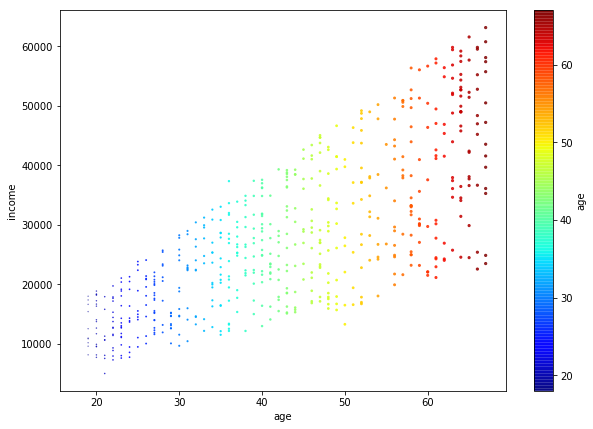

In [9]:
fig, ax = plt.subplots()
df_not_normalized.plot(y='income', x='age',kind='scatter',s=df.age*5, alpha=0.8,c="age", cmap=plt.get_cmap("jet"), colorbar=True, figsize=(10,7),ax=ax)

#### observation
from the scatter plot looks like the income increase with age. Hence, age and income are positively correlated.

#### 9. Create histograms for (non-normalized) Income (using 9 bins) and Age (using 15 bins).

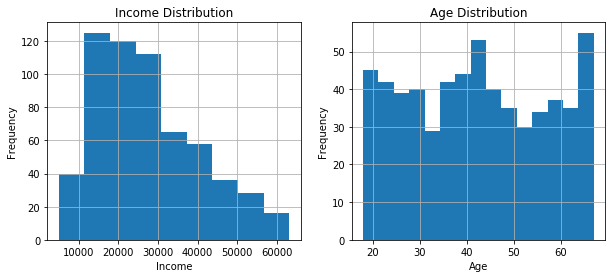

In [11]:
fig = plt.figure(figsize=(10,4))
ax1 = fig.add_subplot(121)
ax1.set_xlabel('Income')
ax1.set_title("Income Distribution")
df_not_normalized.income.plot(kind='hist',bins=9, grid = True)

ax1 = fig.add_subplot(122)
ax1.set_xlabel('Age')
ax1.set_title("Age Distribution")
df_not_normalized.age.plot(kind='hist',bins=15, grid =True)

#### 10. Perform a cross-tabulation of the region attribute with the pep attribute. This requires the aggregation of the occurrences of each pep value (yes or no) separately for each value of the region attribute. Show the results as a 4 by 2 (region x pep) table with entries representing the counts. [Hint: you can either use Numpy or use aggregations functions in Pandas such as groupby() and  cross-tab().] Then, either using Matplotlib directly or the plot() function in Pandas create a bar chart graph to visualize of the relationships between these sets of variables. 

In [12]:
gg = pd.crosstab(df_not_normalized.region,df_not_normalized.pep,margins=True)
gg

pep,NO,YES,All
region,,,
INNER_CITY,146,123,269
RURAL,50,46,96
SUBURBAN,28,34,62
TOWN,102,71,173
All,326,274,600


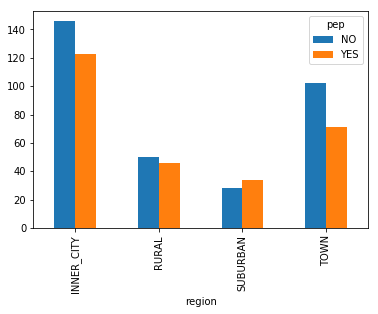

In [149]:
plt.show(gg.plot(kind='bar'))


#### 11. Now consider a modified version of the bank data that contains missing values (bank_data_missing_vals.csv). (a) Using Pandas determine all the attributes with missing values and the number of missing values for each such attribute. (b) Show all the instances in the data that contain a missing value. (c) Fill the missing values for all numeric attributes using the mean value for the attribute. (d) After filling in the missing numeric values, drop all rows where a categorical attribute contains a missing value. (e) Show that the final resulting table does not contain missing values.

In [156]:
empy_dataFileName='http://facweb.cs.depaul.edu/mobasher/classes/csc478/Assignments/bank_data_missing_vals.csv'
df_missing_val = pd.read_csv(empy_dataFileName,index_col=0,na_values=['?'])
df_missing_val.info()

<class 'pandas.core.frame.DataFrame'>
Index: 600 entries, ID12101 to ID12700
Data columns (total 11 columns):
age             590 non-null float64
income          587 non-null float64
children        600 non-null int64
gender          590 non-null object
region          591 non-null object
married         600 non-null object
car             600 non-null object
savings_acct    600 non-null object
current_acct    600 non-null object
mortgage        600 non-null object
pep             600 non-null object
dtypes: float64(2), int64(1), object(8)
memory usage: 56.2+ KB


#### 11.a Using Pandas determine all the attributes with missing values and the number of missing values for each such attribute

from the above info, we can infer the below

| Attribute 	| # of rows 	| # of non null rows 	| # of Missing values 	|
|-----------	|-----------	|--------------------	|---------------------	|
| age       	| 600       	| 590                	| 10                  	|
| income    	| 600       	| 587                	| 13                  	|
| gender    	| 600       	| 590                	| 10                  	|
| region    	| 600       	| 591                	| 9                   	|


#### 11.b  Show all the instances in the data that contain a missing value. 

In [160]:
df_missing_val[df_missing_val.isnull().any(axis=1)] ##column

,age,income,children,gender,region,married,car,savings_acct,current_acct,mortgage,pep
id,,,,,,,,,,,
ID12104,23.0,NaN,3,FEMALE,TOWN,YES,NO,NO,YES,NO,NO
ID12107,22.0,8877.07,0,MALE,NaN,NO,NO,NO,YES,NO,YES
ID12109,37.0,NaN,2,FEMALE,SUBURBAN,YES,YES,NO,NO,NO,NO
ID12135,43.0,NaN,0,MALE,SUBURBAN,NO,NO,YES,YES,NO,YES
ID12142,47.0,26952.60,0,NaN,INNER_CITY,YES,YES,NO,YES,NO,NO
ID12162,65.0,36589.00,1,FEMALE,NaN,NO,YES,NO,YES,NO,YES
ID12178,61.0,49456.70,1,NaN,INNER_CITY,YES,YES,YES,YES,YES,YES
ID12182,30.0,NaN,3,MALE,INNER_CITY,NO,NO,NO,YES,NO,NO
ID12189,30.0,15848.70,0,MALE,NaN,YES,YES,YES,NO,YES,NO


In [166]:
## 11.c Fill the missing values for all numeric attributes using the mean value for the attribute
df_missing_val.fillna(df_missing_val.mean(),axis=0,inplace=True)
df_missing_val

,age,income,children,gender,region,married,car,savings_acct,current_acct,mortgage,pep
id,,,,,,,,,,,
ID12101,48.000000,17546.000000,1,FEMALE,INNER_CITY,NO,NO,NO,NO,NO,YES
ID12102,40.000000,30085.100000,3,MALE,TOWN,YES,YES,NO,YES,YES,NO
ID12103,51.000000,16575.400000,0,FEMALE,INNER_CITY,YES,YES,YES,YES,NO,NO
ID12104,23.000000,27475.594685,3,FEMALE,TOWN,YES,NO,NO,YES,NO,NO
ID12105,57.000000,50576.300000,0,FEMALE,RURAL,YES,NO,YES,NO,NO,NO
ID12106,57.000000,37869.600000,2,FEMALE,TOWN,YES,NO,YES,YES,NO,YES
ID12107,22.000000,8877.070000,0,MALE,NaN,NO,NO,NO,YES,NO,YES
ID12108,58.000000,24946.600000,0,MALE,TOWN,YES,YES,YES,YES,NO,NO
ID12109,37.000000,27475.594685,2,FEMALE,SUBURBAN,YES,YES,NO,NO,NO,NO


In [167]:
## 11.d After filling in the missing numeric values, drop all rows where a categorical attribute contains a missing value.
df_missing_val.dropna(axis=0,inplace=True)
df_missing_val

,age,income,children,gender,region,married,car,savings_acct,current_acct,mortgage,pep
id,,,,,,,,,,,
ID12101,48.000000,17546.000000,1,FEMALE,INNER_CITY,NO,NO,NO,NO,NO,YES
ID12102,40.000000,30085.100000,3,MALE,TOWN,YES,YES,NO,YES,YES,NO
ID12103,51.000000,16575.400000,0,FEMALE,INNER_CITY,YES,YES,YES,YES,NO,NO
ID12104,23.000000,27475.594685,3,FEMALE,TOWN,YES,NO,NO,YES,NO,NO
ID12105,57.000000,50576.300000,0,FEMALE,RURAL,YES,NO,YES,NO,NO,NO
ID12106,57.000000,37869.600000,2,FEMALE,TOWN,YES,NO,YES,YES,NO,YES
ID12108,58.000000,24946.600000,0,MALE,TOWN,YES,YES,YES,YES,NO,NO
ID12109,37.000000,27475.594685,2,FEMALE,SUBURBAN,YES,YES,NO,NO,NO,NO
ID12110,54.000000,24212.100000,2,MALE,TOWN,YES,YES,YES,YES,NO,NO
